Convolution Neural Network

* conv2d is the fuction that executes the concept of the spatial convolution.
* conv2d is cross-correlation (similarity mathch between two items over the time)
* conv2d extracts the features form the input image with the kernal, performing element-wise mul then sum.
* networks (CNNs) to extract hierarchical features, with parameters like stride, padding, and kernel size controlling the output's shape and detail. 

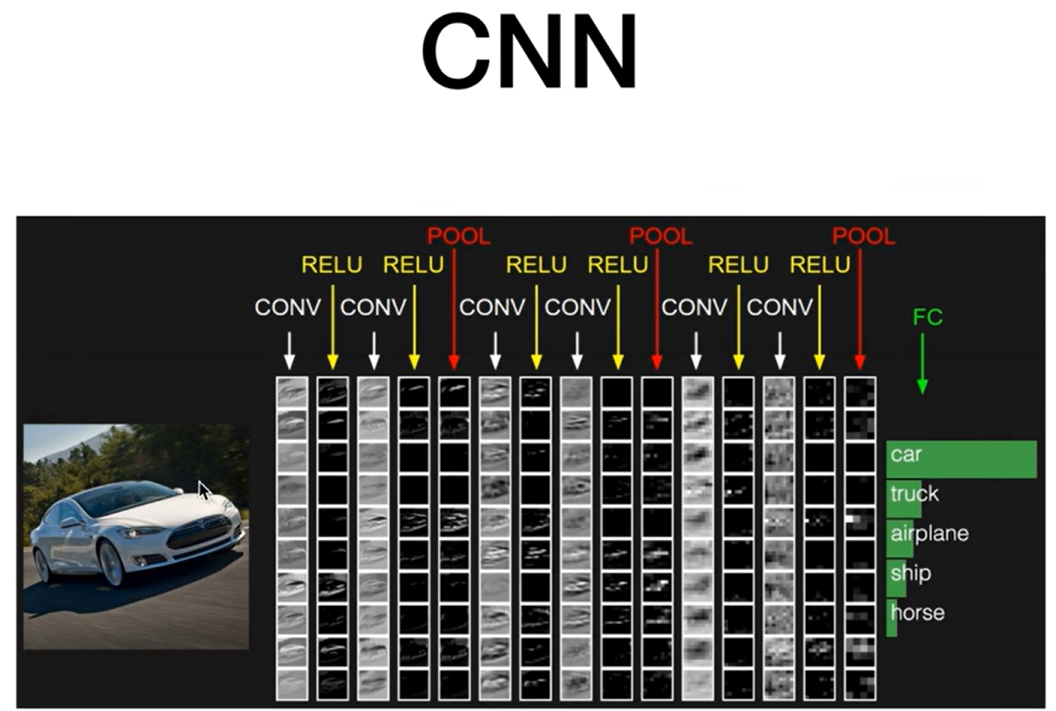

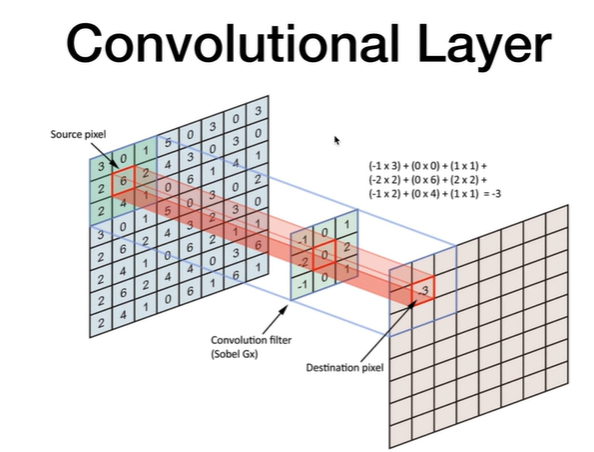

input_image(w) = input_height, input_width
kernel_image(k) = kernel_height, kernel_width

relust_image_(height/width) = (w - k + 2p) / s + 1 

```
w - input image size(h/w)
k - kernel size
s - sride
p - padding
```


Max-Pooling

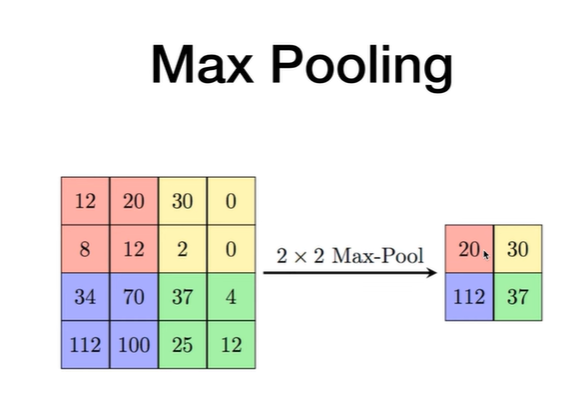

* used to down-sampling the input image
* reduce the computation cost by reducing the input image,
* reduce the model parameters to  learn and avoid over-fitting by providing abstract inputs



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
# Hyper-parameters

num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [4]:
# dataset has PILImage image of range [0,1]
# we transform them to Tensors of normalized range [-1, 1]

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))]
)

Datset

In [6]:
train_dataset = torchvision.datasets.CIFAR10(root='data', train=True, download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

100.0%


Dataset-loader

In [9]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [11]:
classes = ('plane', 'car', 'bird,', 'cat',
           'deer', 'dog', 'frog', 'hourse', 'ship', 'truck')

In [12]:
def imshow(img):
    img = img / 2 + 0.5 #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

<!-- sld
 -->

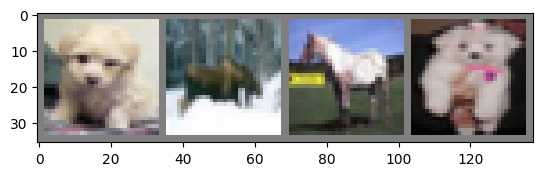

In [13]:
# get some random training images
dataiter = iter(train_loader)
images, lables = dataiter.__next__()

# show images
imshow(torchvision.utils.make_grid(images))

In [19]:
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2,2)
conv2 = nn.Conv2d(6, 16, 5)
print(images.shape)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)

torch.Size([4, 3, 32, 32])
torch.Size([4, 6, 28, 28])
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 10, 10])
torch.Size([4, 16, 5, 5])


Model implementation (CNN)
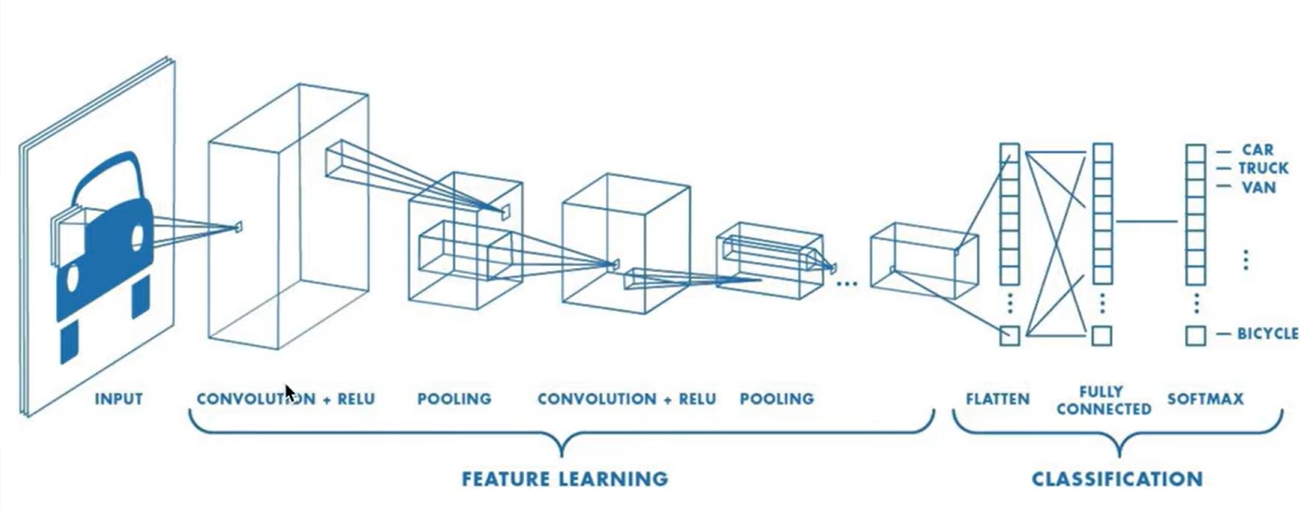

In [20]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2) #2X2 with stride 2
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x 




model = ConvNet().to(device)


Loss and OPtimizer

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Training:

In [24]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        # origin shape : [4, 3, 32, 32] = 4, 3, 1024
        # input_layer : 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)


        #  backward pass
        loss.backward()

        # optimizer
        optimizer.step()

        # zero_grad()
        optimizer.zero_grad()

        if (i+1) % 2000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], step: {i+1}/{n_total_steps}, loss: {loss.item():.4f}')

print("Training Finished!")

Epoch [1/4], step: 2000/12500, loss: 2.3152
Epoch [1/4], step: 4000/12500, loss: 2.2873
Epoch [1/4], step: 6000/12500, loss: 2.2952
Epoch [1/4], step: 8000/12500, loss: 2.2898
Epoch [1/4], step: 10000/12500, loss: 2.3105
Epoch [1/4], step: 12000/12500, loss: 2.3280
Epoch [2/4], step: 2000/12500, loss: 2.0452
Epoch [2/4], step: 4000/12500, loss: 2.2199
Epoch [2/4], step: 6000/12500, loss: 1.7347
Epoch [2/4], step: 8000/12500, loss: 1.8931
Epoch [2/4], step: 10000/12500, loss: 2.0535
Epoch [2/4], step: 12000/12500, loss: 1.9392
Epoch [3/4], step: 2000/12500, loss: 1.7174
Epoch [3/4], step: 4000/12500, loss: 1.7453
Epoch [3/4], step: 6000/12500, loss: 2.3276
Epoch [3/4], step: 8000/12500, loss: 1.8657
Epoch [3/4], step: 10000/12500, loss: 1.7687
Epoch [3/4], step: 12000/12500, loss: 1.8232
Epoch [4/4], step: 2000/12500, loss: 1.8770
Epoch [4/4], step: 4000/12500, loss: 2.3606
Epoch [4/4], step: 6000/12500, loss: 1.4355
Epoch [4/4], step: 8000/12500, loss: 1.0501
Epoch [4/4], step: 10000/1

Evaluation

In [31]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        # max return (values, index)
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predictions == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predictions[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = n_correct / n_samples * 100
    print(f'acc of the network: {acc}')

    for i in range(1,10):
        acc = n_class_correct[i] / n_class_samples[i] * 100
        print(f'Accuracy of {classes[i]}: {acc:.2f} %')



acc of the network: 44.46
Accuracy of car: 62.60 %
Accuracy of bird,: 30.10 %
Accuracy of cat: 19.60 %
Accuracy of deer: 43.30 %
Accuracy of dog: 31.10 %
Accuracy of frog: 51.10 %
Accuracy of hourse: 64.00 %
Accuracy of ship: 45.50 %
Accuracy of truck: 47.40 %
